# Project Description

Prepare a prototype of a machine learning model for [Zyfra](https://www.zyfra.com/). The company develops efficiency solutions for heavy industry.
The model should predict the amount of gold recovered from gold ore. You have the data on extraction and purification.
The model will help to optimize the production and eliminate unprofitable parameters.


## Prepare Data

### Import Libraries and File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, r2_score, mean_absolute_error, confusion_matrix, accuracy_score, mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import make_hastie_10_2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

In [2]:
tr = pd.read_csv('/datasets/gold_recovery_train.csv')
print(tr.shape)
print()
print(tr.duplicated().sum())
print()
display(tr.describe())
print()
display(tr.info())

(16860, 87)

0



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

None

In [3]:
te = pd.read_csv('/datasets/gold_recovery_test.csv')
print(te.shape)
print()
print(te.duplicated().sum())
print()
display(te.describe())
print()
display(tr.info())

(5856, 53)

0



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

None

In [4]:
fu = pd.read_csv('/datasets/gold_recovery_full.csv')
print(fu.shape)
print()
print(fu.duplicated().sum())
print()
display(fu.describe())
print()
display(tr.info())

(22716, 87)

0



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64

None

### Recovery Calculation 

Let's check if recovery is calculated correctly. Using the training set, let's calculate recovery for the rougher.output.recovery feature. Let's also find MAE between calculation and the feature values.

#### Recovery 
We will need to simulate the process of recovering gold from gold ore, function for this is ((C * (F - T)) / (F * C - T)) * 100

In [11]:
def cal_recovery(C, F, T):
    if F == 0 or (C-T) == 0:
        return np.nan
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

#### Calculate Recovery 
Let's calculate rough.output.recovery using above function we just createad and columns from tr dataframe.

In [12]:
calculated_recovery = []
for index, row in tr.iterrows():
    recovery = cal_recovery(row['rougher.output.concentrate_au'],
                            row['rougher.input.feed_au'], row['rougher.output.tail_au'])
    calculated_recovery.append(recovery)

tr['calculated_recovery'] = calculated_recovery

In [13]:
# Drop rows with missing values in 'rougher.output.recovery' and 'calculated_recovery'
tr.dropna(subset=['rougher.output.recovery', 'calculated_recovery',
          'rougher.input.feed_au', 'rougher.output.tail_au'], inplace=True)

In [14]:
# rougher.output.recovery mean for comparison
print(tr['rougher.output.recovery'].mean())

82.39420120842004


#### MAE

In [15]:
# Let's get MAE between calculated and provided recovery

recovery_mae = mean_absolute_error(
    tr['rougher.output.recovery'], tr['calculated_recovery'])
print('Recovery provided vs calculated MAE :', recovery_mae)

Recovery provided vs calculated MAE : 9.303415616264301e-15


<div class="alert alert-info"> <b> Data Review </b>: Provided that range of recovery is ~166, 6.3 MAE between actual vs calculated is not significant. 

### Features not available

From the list of features and their naming conventions. Metal names are attached at the end '_metal' (e.g. rougher.input.feed_au)
<li> rougher.input.feed</li>
<li> rougher.output.tail</li>
<li> rougher.output.concentrate</li>
<li> primary_cleaner.output.tail</li>
<li> primary_cleaner.output.concentrate</li>
<li> secondary_cleaner.output.tail</li>
<li> final.tail</li>
<li> final.output.concentrate</li> 

Metal we are concerned with are Au, Ag, and Pb. Another measure we are concerned about is "recovery" which can be added to feature name as we did with metal (e.g. rougher.output.recovery)

In [17]:
# Let's find columns missing in te when compared to tr

tr_columns = set(tr.columns)
te_columns = set(te.columns)

columns_only_in_tr = tr_columns - te_columns

print("Columns in tr not present in te:")
for column in columns_only_in_tr:
    print(column)

Columns in tr not present in te:
final.output.recovery
final.output.tail_pb
rougher.output.tail_pb
primary_cleaner.output.concentrate_au
rougher.calculation.floatbank10_sulfate_to_au_feed
primary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
rougher.output.concentrate_pb
final.output.tail_sol
primary_cleaner.output.concentrate_sol
final.output.concentrate_pb
rougher.output.concentrate_au
rougher.calculation.au_pb_ratio
final.output.tail_ag
rougher.output.concentrate_ag
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
rougher.output.tail_ag
rougher.output.concentrate_sol
primary_cleaner.output.tail_pb
final.output.concentrate_ag
primary_cleaner.output.concentrate_pb
secondary_cleaner.output.tail_au
rougher.output.tail_au
final.output.concentrate_sol
primary_cleaner.output.concentrate_ag
calculated_recovery
final.output.concentrate_au
rougher.calculation.sulfate_to_au_concentrate
secondary_cleaner.output.tail_sol
final.output.tail_au
primary_cleaner.output.tail_sol
roug

<div class="alert alert-info"> <b> Data Review </b>:
    <li> As seen in Calculated Recovery (1.2.2), recovery can of gold can be calculated through formulat that simluates the recovery process with a slight discrepency (as seen in section MAE 1.2.3). <ul>
        <li> Hence missing recoveries (rougher.output.recovery & final.output.recovery) can be calculated. </li></ul></li>
    <li> Above list is comprehenisve list of what's missing from te dataframe when compared with tr. Below are ones that are missing recovery or missing values to calculate recovery: <ul>
        <li> rougher.output.recovery </li>
        <li> rougher.output.tail_au </li>
        <li> final.output.tail_au </li>
        <li> final.output.recovery </li> </ul></li>
    <li> Missing values can also be driven from fu dataframe since tr is the full source dataset that contains the training (tr) and test (te) sets with all the features with same index </li>

### Preprocessing

As we have seen in importing file stage, there were no duplicate values in any of the files, but there were quite a bit of columns that were missing values in file. Let's resolve the missing value and columns issue.

In [18]:
# Check uniqueness of date columns in tr, te, and fu
print("Are dates unique in tr?", tr['date'].is_unique)
print("Are dates unique in te?", te['date'].is_unique)
print("Are dates unique in fu?", fu['date'].is_unique)

Are dates unique in tr? True
Are dates unique in te? True
Are dates unique in fu? True


In [19]:
# Let's copy over missing targets
columns_to_copy = ['rougher.output.recovery','final.output.recovery']
columns_from_fu = fu[['date'] + columns_to_copy]
te = te.merge(columns_from_fu,on='date',how='left')

In [20]:
# Let's double check columns_to_copy are now in te 
if set(columns_to_copy).issubset(te.columns):
    print('targets are now in te')
else: 
    print('targets are not in te')

targets are now in te


In [21]:
te.set_index('date', inplace=True)
fu.set_index('date', inplace=True)

# Select columns with missing values in 'te'
columns_with_missing_values = te.columns[te.isnull().any()].tolist()

# Copy over missing values from 'fu' to 'te'
te[columns_with_missing_values] = te[columns_with_missing_values].fillna(fu[columns_with_missing_values])

# Resetting the index if needed
te.reset_index(inplace=True)

In [22]:
# Let's drop rows with missing values in 'rougher.output.recovery' for te as we did for tr
te.dropna(subset=['rougher.output.recovery'], inplace=True)

In [23]:
# Date doesn't impact the purification so let's drop it from tr
tr_nd = tr.drop(['date'], axis=1)
te_nd = te.drop(['date'], axis=1)

<div class="alert alert-info"> <b> Student Comment </b>: I have copied over missing columns in te from fu using dates and dropped missing target rows. I have also dropped the date since it doesn't impact purification.

## Data Analysis

### Metal concentration change per purification stage

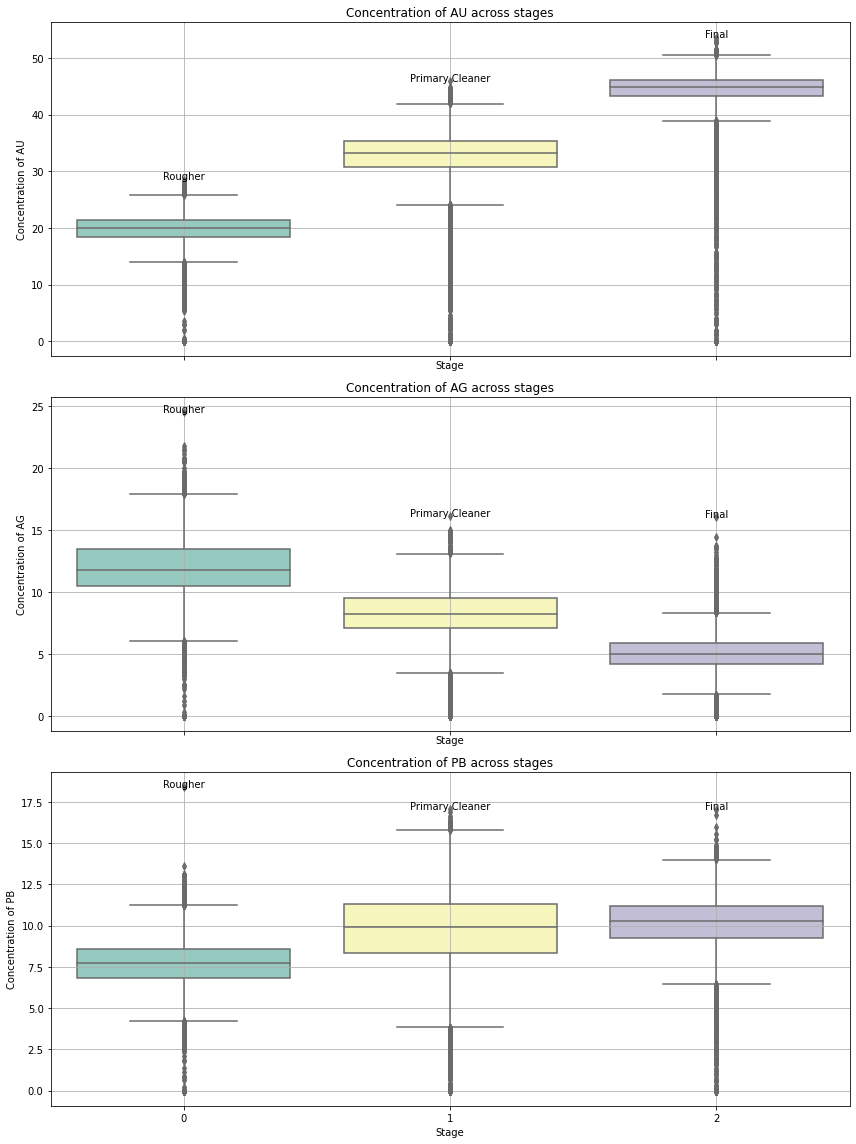

In [24]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
stage_labels = ['Rougher', 'Primary Cleaner', 'Final']

fig, axes = plt.subplots(len(metals), 1, figsize=(12, 16), sharex=True)

for i, metal in enumerate(metals):
    metal_concentrations = [stage + '_' + metal for stage in stages]  # Get columns for each metal
    
    metal_data = [tr_nd[concentration] for concentration in metal_concentrations]
    
    sns.boxplot(data=metal_data, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Concentration of {metal.upper()} across stages')
    axes[i].set_ylabel(f'Concentration of {metal.upper()}')
    axes[i].set_xlabel('Stage')
    axes[i].grid(True)
    
    # Annotate boxes with stage names
    for j, concentration in enumerate(metal_concentrations):
        axes[i].text(j, metal_data[j].max(), stage_labels[j], horizontalalignment='center', fontsize=10)
    
plt.tight_layout()
plt.show()

In [25]:
metals = ['au', 'pb', 'ag']
stages = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']

for metal in metals:
    metal_concentrations = [stage + '_' + metal for stage in stages]  # Get columns for each metal
    
    metal_data = [tr_nd[concentration] for concentration in metal_concentrations]
    
    print(f"Statistics for {metal.upper()} concentration across stages:")
    for i, stage in enumerate(stages):
        print(f"\nStage: {stage}")
        print(f"Max: {metal_data[i].max():.2f}")
        print(f"Median: {metal_data[i].median():.2f}")
        print(f"Mean: {metal_data[i].mean():.2f}\n")

Statistics for AU concentration across stages:

Stage: rougher.output.concentrate
Max: 28.52
Median: 19.94
Mean: 19.40


Stage: primary_cleaner.output.concentrate
Max: 45.93
Median: 33.21
Mean: 32.27


Stage: final.output.concentrate
Max: 53.61
Median: 44.86
Mean: 43.75

Statistics for PB concentration across stages:

Stage: rougher.output.concentrate
Max: 18.39
Median: 7.76
Mean: 7.65


Stage: primary_cleaner.output.concentrate
Max: 17.08
Median: 9.92
Mean: 9.55


Stage: final.output.concentrate
Max: 17.03
Median: 10.28
Mean: 10.07

Statistics for AG concentration across stages:

Stage: rougher.output.concentrate
Max: 24.48
Median: 11.74
Mean: 11.76


Stage: primary_cleaner.output.concentrate
Max: 16.08
Median: 8.21
Mean: 8.16


Stage: final.output.concentrate
Max: 16.00
Median: 4.99
Mean: 5.12



<div class="alert alert-info"> <b> Data Review </b>:
    <li> Concentration of AU across purification stages: <ul>
        <li> Max, median, and average concentration has increased as purification process progressed </li></ul></li>
    <li> Concentration of PB acorss purification stages: <ul>
        <li> Max concentration has decreased as purifcation process progressed from 18.39 to 17.03. </li>
        <li> Median and average increased as purifcation process progressed. Median increased from 7.58 to 10.07 and average increased from 6.88 to 9.12. </li></ul></li>
    <li> Concentration of AG acorss purification stages: <ul>
        <li> Max, median, and average AG concentration has decreased as purification process progressed </li></ul></li>

### Feed Particle size distribution 
In this section we will compare the feed particle distribution between training set and test set. 

In [26]:
# There are no missing values in either training or test set. 
# However, discrepeancy in the entries between the tsets will cause inconsistency in SAMPE calulation of feed_size.
# Let's use subset of training set that matches the size of the test set to compare directly. 

# Sample a subset from the training set matching the size of the test set
sampled_train = tr_nd.sample(n=len(te), random_state=4321)

# Extract 'primary_cleaner.input.feed_size' columns from both sampled_train and te
sampled_train_feed_size = sampled_train['primary_cleaner.input.feed_size']
test_feed_size = te_nd['primary_cleaner.input.feed_size']

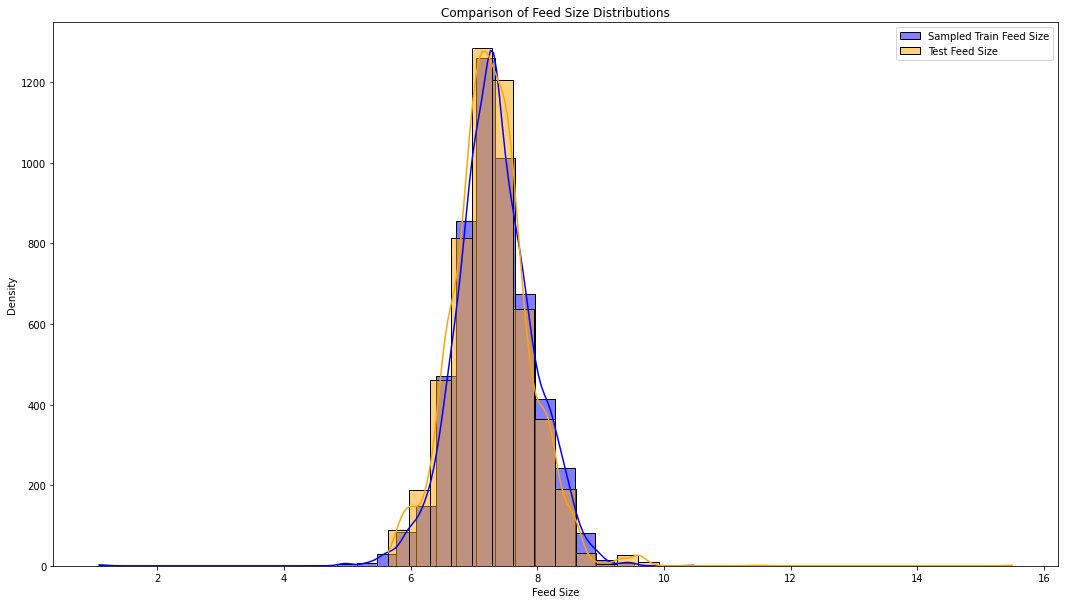

In [27]:
# Compare the distributions using visualization
plt.figure(figsize=(18, 10))

sns.histplot(sampled_train_feed_size, bins=30, kde=True, color='blue', label='Sampled Train Feed Size')
sns.histplot(test_feed_size, bins=30, kde=True, color='orange', label='Test Feed Size')

plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.title('Comparison of Feed Size Distributions')
plt.legend()

plt.show()

In [28]:
# Calculate statistical measures
train_mean = sampled_train_feed_size.mean()
test_mean = test_feed_size.mean()

train_median = sampled_train_feed_size.median()
test_median = test_feed_size.median()

train_std = sampled_train_feed_size.std()
test_std = test_feed_size.std()

# Print the results
print(f"Mean of Train Feed Size: {train_mean:.2f}")
print(f"Mean of Test Feed Size: {test_mean:.2f}\n")

print(f"Median of Train Feed Size: {train_median:.2f}")
print(f"Median of Test Feed Size: {test_median:.2f}\n")

print(f"Standard Deviation of Train Feed Size: {train_std:.2f}")
print(f"Standard Deviation of Test Feed Size: {test_std:.2f}")

Mean of Train Feed Size: 7.32
Mean of Test Feed Size: 7.27

Median of Train Feed Size: 7.30
Median of Test Feed Size: 7.25

Standard Deviation of Train Feed Size: 0.61
Standard Deviation of Test Feed Size: 0.61


<div class="alert alert-info"> <b> Data Review </b>:
    As seen in the histogram and statistical measures, feed size between sampled train and test feed size are similar in values/range. 

### Total Concentration of all substances at different stages
In this section we will take a look at raw feed, rougher concentrate, and final concentrate. 

In [29]:
# Calculate total concentrations for each stage
tr_nd['total_raw_feed'] = tr_nd['rougher.input.feed_ag'] + tr_nd['rougher.input.feed_pb'] + tr_nd['rougher.input.feed_au']
tr_nd['total_rougher'] = tr_nd['rougher.output.concentrate_ag'] + tr_nd['rougher.output.concentrate_pb'] + tr_nd['rougher.output.concentrate_au']
tr_nd['total_concentrate'] = tr_nd['primary_cleaner.output.concentrate_ag']+tr_nd['primary_cleaner.output.concentrate_pb']+tr_nd['primary_cleaner.output.concentrate_au']
tr_nd['total_final'] = tr_nd['final.output.concentrate_ag']+tr_nd['final.output.concentrate_pb']+tr_nd['final.output.concentrate_au']

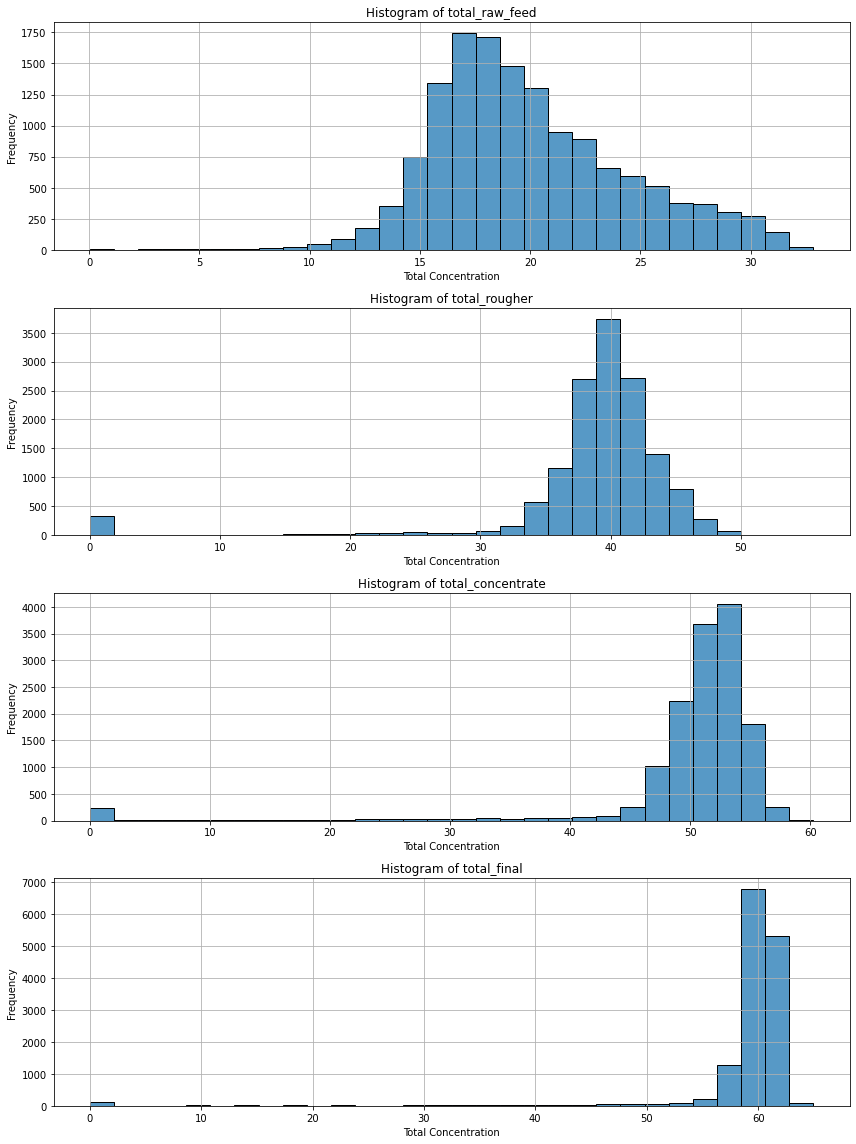

In [30]:
# List of total concentration columns for each stage
total_columns = ['total_raw_feed', 'total_rougher', 'total_concentrate', 'total_final']

# Plot histograms for each stage's total concentrations using Seaborn
fig, axes = plt.subplots(len(total_columns), 1, figsize=(12, 16))

for i, column in enumerate(total_columns):
    sns.histplot(data=tr_nd[column].dropna(), bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Total Concentration')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-info"> <b> Data Review </b>:
   <li> Total concentration of all substances are normally distributed in each stage with abonormal values/outliers around 0 - 5. </li>
    <li> Since these outliers are limited to lower end of the total concentration values, they may skew the model prediction to be lower than actual. </li>

In [31]:
# Let's remove abnormalities from each stage

def remove_abn (df, columns, threshold):
    for col in columns:
        df = df[df[col] > threshold]
    return df

threshold_value = 5

total_concen_columns = ['total_raw_feed','total_rougher', 'total_concentrate', 'total_final']

tr_cleaned = remove_abn(tr_nd,total_concen_columns, 5)

## Build the Model

### sMAPE Functions
Function to calculate the SMAPE and final SMAPE

In [32]:
def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

In [33]:
def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    alpha = 0.25
    beta = 0.75
    smape_rougher = smape(rougher_true,rougher_pred)
    smape_final = smape(final_true,final_pred)
    final_smape = alpha * smape_rougher + beta * smape_final
    
    return final_smape

<div class="alert alert-info"> <b> Student's comment </b>:
    I have revised the final_smape 

### Data prep
Let's prepare the tr dataset for model trainings

In [34]:
print(tr_cleaned.shape)
print(te_nd.shape)

(13457, 91)
(5310, 54)


In [35]:
# Let's ensure that columns are same in tr and te
columns_only_in_tr_cleaned = set(tr_cleaned.columns) - set(te_nd.columns)
tr_cleaned = tr_cleaned.drop(columns=columns_only_in_tr_cleaned)

In [36]:
print(tr_cleaned.shape)
print(te_nd.shape)

(13457, 54)
(5310, 54)


In [37]:
# For Rougher
featuresR = tr_cleaned.drop(['rougher.output.recovery','final.output.recovery'],axis = 1)
targetR = tr_cleaned[['rougher.output.recovery']]

In [38]:
# Let's check if there are missing values
missing_featuresR = featuresR.isnull().sum().sum()
missing_targetR = targetR.isnull().sum().sum()
print(f"Missing values in featuresR: {missing_featuresR}")
print(f"Missing values in targetR: {missing_targetR}")

Missing values in featuresR: 1339
Missing values in targetR: 0


In [39]:
# Let's drop those missing values
featuresR.dropna(inplace=True)

In [40]:
# Let's check the shape
print("Features shape:", featuresR.shape)
print("Target shape:", targetR.shape)

Features shape: (12241, 52)
Target shape: (13457, 1)


In [41]:
# Drop rows with NaN values in both 'featuresR' and 'targetR'
featuresR= featuresR.dropna()
targetR = targetR.loc[featuresR.index]

# Check the shape again
print("FeaturesR shape:", featuresR.shape)
print("TargetR shape:", targetR.shape)

FeaturesR shape: (12241, 52)
TargetR shape: (12241, 1)


In [42]:
# For Final
featuresF = tr_cleaned.drop(['final.output.recovery','rougher.output.recovery'],axis=1)
targetF = tr_cleaned['final.output.recovery']

In [43]:
# Let's check if there are missing values
missing_featuresF = featuresF.isnull().sum().sum()
missing_targetF = targetF.isnull().sum().sum()
print(f"Missing values in featuresR: {missing_featuresF}")
print(f"Missing values in targetR: {missing_targetF}")

Missing values in featuresR: 1339
Missing values in targetR: 25


In [44]:
# Let's drop those missing values
featuresF.dropna(inplace=True)
targetF.dropna(inplace=True)
# Reset the indices
featuresF.reset_index(drop=True, inplace=True)
targetF.reset_index(drop=True, inplace=True)

In [45]:
# Drop rows with NaN values in both 'featuresF' and 'targetF'
featuresF = featuresF.dropna()
targetF = targetF.loc[featuresF.index]

# Check the shape again
print("FeaturesF shape:", featuresF.shape)
print("TargetF shape:", targetF.shape)

FeaturesF shape: (12241, 52)
TargetF shape: (12241,)


### Decision Tree Regressor

In [101]:
smape_score = make_scorer(smape, greater_is_better=False)

# Define the parameter grid
param_grid = {'max_depth': range(1, 51,2)}

# Create the DecisionTreeRegressor
modelR = DecisionTreeRegressor(random_state=1234)

# Perform grid search to find the best max_depth
grid_search = GridSearchCV(estimator=modelR, param_grid=param_grid, scoring=smape_score)
grid_search.fit(featuresR, targetR)

# Get the best parameters and best score
best_max_depth_R = grid_search.best_params_['max_depth']
best_smape_R = -grid_search.best_score_

print('Best max depth for rougher stage:', best_max_depth_R)
print('Best sMAPE for rougher stage:', best_smape_R)

# Use cross_val_score to get cross-validation scores
cv_scores_R = cross_val_score(grid_search.best_estimator_, featuresR, targetR, cv=5, scoring=smape_score)
average_cv_smape_R = -np.mean(cv_scores_R)

print('Average cross-validation sMAPE for rougher stage:', average_cv_smape_R)

Best max depth for rougher stage: 5
Best sMAPE for rougher stage: 6.722332733745347
Average cross-validation sMAPE for rougher stage: 6.722332733745347


In [46]:
modelR = DecisionTreeRegressor(random_state = 1234 , max_depth = 5)
modelR.fit(featuresR,targetR)
predictionsR = modelR.predict(featuresR)
targetR = targetR.squeeze()
smapeR = smape(targetR, predictionsR)
print(f'SMAPE for rougher stage: {smapeR:.4f}')

SMAPE for rougher stage: 4.1774


In [129]:
param_grid = {'max_depth': range(1, 41,2)}
modelF = DecisionTreeRegressor(random_state=1234)
grid_search = GridSearchCV(estimator=modelF, param_grid=param_grid, scoring=smape_score)
grid_search.fit(featuresF, targetF)
best_max_depth_F = grid_search.best_params_['max_depth']
best_smape_F = -grid_search.best_score_
print('Best max depth for final stage:', best_max_depth_F)
print('Best sMAPE for rougher stage:', best_smape_F)
cv_scores_F = cross_val_score(grid_search.best_estimator_, featuresF, targetF, cv=5, scoring=smape_score)
average_cv_smape_F = -np.mean(cv_scores_F)
print('Average cross-validation sMAPE for final stage:', average_cv_smape_F)

Best max depth for final stage: 28
Best sMAPE for rougher stage: 15.229495371463477
Average cross-validation sMAPE for final stage: 15.229495371463477


In [47]:
modelF = DecisionTreeRegressor(random_state = 1234 , max_depth = 1)
modelF.fit(featuresF,targetF)
predictionsF = modelF.predict(featuresF)
smapeF = smape(targetF, predictionsF)
print(f'SMAPE for final stage: {smapeF:.4f}')

SMAPE for final stage: 9.1601


In [48]:
rougher_predDCR = predictionsR
final_predDCR = predictionsF
rougher_trueDCR = targetR
final_trueDCR = targetF

final_smape_DCR = final_smape(rougher_trueDCR,rougher_predDCR,final_trueDCR,final_predDCR)
print(f'Final SMAPE for Decision Tree Regressor: {final_smape_DCR: .4f}')

Final SMAPE for Decision Tree Regressor:  7.9145


### Random Forest Regressor

In [105]:
param_grid = {'max_depth': range(1, 51,2)}
modelRR = RandomForestRegressor(random_state=1234)
grid_search = GridSearchCV(estimator=modelRR, param_grid=param_grid, scoring=smape_score)
grid_search.fit(featuresR, targetR)
best_max_depth_RR = grid_search.best_params_['max_depth']
best_smape_RR = -grid_search.best_score_
print('Best max depth for rough stage:', best_max_depth_RR)
print('Best sMAPE for rougher stage:', best_smape_RR)
cv_scores_RR = cross_val_score(grid_search.best_estimator_, featuresR, targetR, cv=5, scoring=smape_score)
average_cv_smape_RR = -np.mean(cv_scores_RR)
print('Average cross-validation sMAPE for rough stage:', average_cv_smape_RR)

Best max depth for rough stage: 7
Best sMAPE for rougher stage: 5.9119616015406935
Average cross-validation sMAPE for rough stage: 5.9119616015406935


In [49]:
modelRR = RandomForestRegressor(random_state = 1234 , max_depth = 7 )
modelRR.fit(featuresR,targetR)
predictionsRR = modelRR.predict(featuresR)
smapeRR = smape(targetR, predictionsRR)
print(f'SMAPE for rougher stage: {smapeRR:.4f}')

SMAPE for rougher stage: 3.1880


In [106]:
param_grid = {'max_depth': range(3, 51,2)}
modelRF = RandomForestRegressor(random_state=1234)
grid_search = GridSearchCV(estimator=modelRF, param_grid=param_grid, scoring=smape_score)
grid_search.fit(featuresF, targetF)
best_max_depth_RF = grid_search.best_params_['max_depth']
best_smape_RF = -grid_search.best_score_
print('Best max depth for final stage:', best_max_depth_RF)
print('Best sMAPE for final stage:', best_smape_RF)
cv_scores_RF = cross_val_score(grid_search.best_estimator_, featuresF, targetF, cv=5, scoring=smape_score)
average_cv_smape_RF = -np.mean(cv_scores_RF)
print('Average cross-validation sMAPE for final stage:', average_cv_smape_RF)

Best max depth for final stage: 1
Best sMAPE for final stage: 10.214652379790499
Average cross-validation sMAPE for final stage: 10.214652379790499


In [50]:
modelRF = RandomForestRegressor(random_state = 1234 , max_depth = 3)
modelRF.fit(featuresF,targetF)
predictionsRF = modelRF.predict(featuresF)
smapeRF = smape(targetF, predictionsRF)
print(f'SMAPE for final stage: {smapeRF:.4f}')

SMAPE for final stage: 8.3374


In [51]:
rougher_predRFR = predictionsRR
final_predRFR = predictionsRF
rougher_trueRFR = targetR
final_trueRFR = targetF

final_smape_RFR = final_smape(rougher_trueRFR,rougher_predRFR,final_trueRFR,final_predRFR)
print(f'Final SMAPE for Random Forest Regressor: {final_smape_RFR: .4f}')

Final SMAPE for Random Forest Regressor:  7.0501


<div class="alert alert-info"> <b> Data Review </b>: 

- **Decision Tree Regressor:**
  - Achieved a reasonable SMAPE of 4.18 for the Rougher Stage after training.
  - Average cross-validation sMAPE for the rougher stage: 6.72
  - The Final Stage SMAPE after training is 9.16 after training.
  - Average cross-validation sMAPE for the final stage: 15.23

- **Random Forest Regressor:**
  - Outperformed the Decision Tree Regressor in the Rougher Stage with a lower sMAPE of 3.19.
  - Average cross-validation sMAPE for the rougher stage: 5.91
  - The Final Stage SMAPE after training is 8.34 after training.
  - Average cross-validation sMAPE for the final stage: 10.21


## Final Test 
Let's see if test set will also give us similar low final SMAPE

### Prep test set
Let's prepare the te dataset for model trainings

In [52]:
print(te_nd.shape)

(5310, 54)


In [53]:
# For Rougher
featuresTER = te_nd.drop(['rougher.output.recovery','final.output.recovery'],axis = 1)
targetTER = te_nd[['rougher.output.recovery']]

In [54]:
# Let's check if there are missing values
missing_featuresTER = featuresTER.isnull().sum().sum()
missing_targetTER = targetTER.isnull().sum().sum()
print(f"Missing values in featuresTER: {missing_featuresR}")
print(f"Missing values in targetTER: {missing_targetR}")

Missing values in featuresTER: 1339
Missing values in targetTER: 0


In [55]:
# Let's drop those missing values
featuresTER.dropna(inplace=True)

In [56]:
# Let's check the shape
print("Features shape:", featuresTER.shape)
print("Target shape:", targetTER.shape)

Features shape: (5245, 52)
Target shape: (5310, 1)


In [57]:
# Trim the target based on the indices of the features
targetTER = targetTER.loc[featuresTER.index]

# Check the shapes again
print("Features shape:", featuresTER.shape)
print("Target shape:", targetTER.shape)

Features shape: (5245, 52)
Target shape: (5245, 1)


In [58]:
# For Final
featuresTEF = te_nd.drop(['final.output.recovery','rougher.output.recovery'],axis=1)
targetTEF = te_nd['final.output.recovery']

In [59]:
# Let's check if there are missing values
missing_featuresTEF = featuresTEF.isnull().sum().sum()
missing_targetTEF = targetTEF.isnull().sum().sum()
print(f"Missing values in featuresR: {missing_featuresTEF}")
print(f"Missing values in targetR: {missing_targetTEF}")

Missing values in featuresR: 99
Missing values in targetR: 20


In [60]:
# Let's drop those missing values
featuresTEF.dropna(inplace=True)
targetTEF.dropna(inplace=True)
# Reset the indices
featuresTEF.reset_index(drop=True, inplace=True)
targetTEF.reset_index(drop=True, inplace=True)
missing_featuresTEF = featuresTEF.isnull().sum().sum()
missing_targetTEF = targetTEF.isnull().sum().sum()
print(f"Missing values in featuresTEF: {missing_featuresTEF}")
print(f"Missing values in targetTEF: {missing_targetTEF}")
# Let's check the shape
print("FeaturesTEF shape:", featuresTEF.shape)
print("TargetTEF shape:", targetTEF.shape)

Missing values in featuresTEF: 0
Missing values in targetTEF: 0
FeaturesTEF shape: (5245, 52)
TargetTEF shape: (5290,)


In [61]:
# Trim the target based on the indices of the features
targetTEF = targetTEF.loc[featuresTEF.index]

# Check the shapes again
print("Features shape:", featuresTEF.shape)
print("Target shape:", targetTEF.shape)

Features shape: (5245, 52)
Target shape: (5245,)


### Final Model 
Let's train test dataset 

In [62]:
predictionsTERFRR = modelRR.predict(featuresTER)
targetTER = targetTER.squeeze()
smapeTERFRR = smape(targetTER, predictionsTERFRR)
print(f'SMAPE for rougher stage: {smapeTERFRR:.4f}')

SMAPE for rougher stage: 8.0106


In [63]:
predictionsTEFRFR = modelRF.predict(featuresTEF)
smapeTEFRFR = smape(targetTEF, predictionsTEFRFR)
print(f'SMAPE for final stage: {smapeTEFRFR:.4f}')

SMAPE for final stage: 11.4452


In [64]:
rougher_predTEDCR = predictionsTERFRR
final_predTEDCR = predictionsTEFRFR
rougher_trueTEDCR = targetTER
final_trueTEDCR = targetTEF

final_smape_DCR = final_smape(rougher_trueTEDCR,rougher_predTEDCR,final_trueTEDCR,final_predTEDCR)
print(f'Final SMAPE : {final_smape_DCR: .4f}')

Final SMAPE :  10.5865


<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Alright!

</div>

### Comparison with a simple baseline

In [66]:
# Create a DummyRegressor that predicts the mean of the rougher stage target variable
baseline_model_Rougher = DummyRegressor(strategy='mean')

# Train the baseline model on the training set for the rougher stage
baseline_model_Rougher.fit(featuresR, targetR)

# Use the trained baseline model to make predictions on the test set for the rougher stage
predictions_baseline_Rougher = baseline_model_Rougher.predict(featuresTER)

# Evaluate the baseline model's performance using SMAPE for the rougher stage
smape_baseline_Rougher = smape(targetTER, predictions_baseline_Rougher)
print(f'SMAPE for Dummy Regressor (Baseline) for Rougher Stage on the test set: {smape_baseline_Rougher:.4f}')

SMAPE for Dummy Regressor (Baseline) for Rougher Stage on the test set: 9.1034


In [67]:
# Create a DummyRegressor that predicts the mean of the final stage target variable
baseline_model_Final = DummyRegressor(strategy='mean')

# Train the baseline model on the training set for the final stage
baseline_model_Final.fit(featuresF, targetF)

# Use the trained baseline model to make predictions on the test set for the final stage
predictions_baseline_Final = baseline_model_Final.predict(featuresTEF)

# Evaluate the baseline model's performance using SMAPE for the final stage
smape_baseline_Final = smape(targetTEF, predictions_baseline_Final)
print(f'SMAPE for Dummy Regressor (Baseline) for Final Stage on the test set: {smape_baseline_Final:.4f}')

SMAPE for Dummy Regressor (Baseline) for Final Stage on the test set: 10.2747


<div class="alert alert-info"> <b> Data Review </b>: 
    <li> Random Forest Regressor: <ul>
        <li> Achieved a SMAPE of 8.01 for the Rougher Stage after training.</li>
        <li> The Final Stage SMAPE after training is 11.45, and overall Final SMAPE is 10.59</li>
    <li> Baseline Model (Dummy Regressor): <ul>
        <li> Achieved a SMAPE of 9.10 for the Rougher Stage.</li>
        <li> The Final Stage SMAPE is 10.27.</li></ul></li>
    <li> Conclusion:<ul>
        <li> The Random Forest Regressor has proven to be a valuable model for predicting both rougher and final stage recovery in the gold extraction process.</li></ul></li>